Order -> [0, 3, 1, 4, 8, 2, 5, 6, 9, 7, 10, 11, 12, 13, 14, 15]
{0: [3, 1, 4], 1: [8], 2: [2, 5, 6], 3: [9], 4: [], 5: [7], 6: [], 7: [10], 8: [11, 12], 9: [], 10: [13], 11: [14], 12: [15], 13: [], 14: [], 15: []}


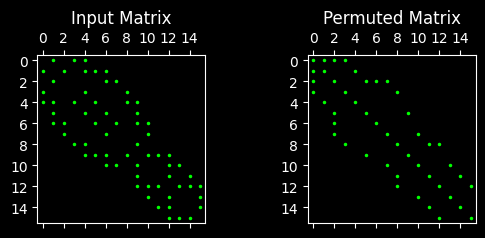

In [5]:
from scipy.io import mmread
from scipy.sparse import csr_matrix
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
plt.style.use('dark_background')


def Cut_Hill(queue,order_num,ip,output,parent_child_rel):
    while queue!=[]:
        idx=[]

        while queue!=[]:
            a=queue.pop(0)
            for i in range(len(a)):
                if a[i]!=0:idx.append(i)     #finding the adjacent nodes
            idx.append('')                   # seperating one's node, with other adjacent nodes (for later calculation)
            ip[ip.index(a)].append('v')      # marking as visited
            
        nodes_in_min_order=[]
        nodes=[]

        for i in idx:
            if i!='': 
                if 'v' not in ip[i] and (i,len(list(filter(lambda x:x!=0,ip[i])))) not in nodes_in_min_order:
                    nodes.append((i,len(list(filter(lambda x:x!=0,ip[i])))))         #appending unvisited nodes as (node,degree of node)
            else:
                nodes=sorted(nodes,key=lambda i:i[1])       #nodes are sorted based on their degrees
                parent_child_rel.update({order_num:[i[0] for i in nodes]})   #nodes are updated into the main dictionary... Stores Parent Child relation
                order_num+=1   #the new order
                for j in nodes:
                    nodes_in_min_order.append((j[0],len(list(filter(lambda x:x!=0,ip[j[0]])))))  #sorted nodes are added into a list (for checking visited)
                    queue.append(ip[j[0]])  #each node's list is appended into the queue
                nodes=[]
        
        for i in nodes_in_min_order:   #All the nodes which were sorted are now given to the output list for the Final order
            output.append(i[0])
    
    return (output,parent_child_rel)

            #input taken from the slides

def Cut_Hill_Mckee_Driver(ip):
    
    mapped_adj_matrix=[0,len(ip)]
    for i in range(len(ip)):
        sm=len(list(filter(lambda x:x!=0,ip[i])))      #finds a node with minimum degree
        if mapped_adj_matrix[1]>sm:
            mapped_adj_matrix[1]=sm
            mapped_adj_matrix[0]=i


    queue=[ip[mapped_adj_matrix[0]]]      #starting node
    output=[mapped_adj_matrix[0]]
    parent_child_rel={}
    for_mapping_idxs = {}

    output,parent_child_rel=Cut_Hill(queue,0,[i[:] for i in ip],output,parent_child_rel)
    ###################################
    print(f"Order -> {output}")
    for i in parent_child_rel.keys():
        for_mapping_idxs.update({output[i]:i})   #mapping the new order with the indices taken
    print(parent_child_rel)
    mapped_adj_matrix=np.zeros((len(ip),len(ip)))

    for i in parent_child_rel:
        for j in parent_child_rel[i]:
            mapped_adj_matrix[i][for_mapping_idxs[j]]=1    #creating adjacency matrix
            mapped_adj_matrix[for_mapping_idxs[j]][i]=1
        mapped_adj_matrix[i][i]=1

    mapped_adj_matrix=csr_matrix(mapped_adj_matrix)
    plt.subplot(2,2,1)
    plt.spy(ip,marker='.',markersize=3,color='lime')
    plt.title('Input Matrix')
    plt.subplot(2,2,2)
    plt.spy(csr_matrix(mapped_adj_matrix), markersize=3,marker='.',color='lime')
    plt.title('Permuted Matrix')
    plt.show()


ip=[
    [0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0],#0
    [1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0],#1
    [0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0],#2
    [1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0],#3
    [1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0],#4
    [0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0],#5
    [0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0],#6
    [0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0],#7
    [0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0],#8
    [0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,0],#9
    [0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0],#10
    [0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0],#11
    [0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1],#12
    [0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1],#13
    [0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1],#14
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0],#15  
]
Cut_Hill_Mckee_Driver(ip)